## args 和 *kwargs
         首先让我告诉你, 其实并不是必须写成*args 和**kwargs。 只有变量前面的 *(星号)才是必须的. 你也可以写成*var 和**vars. 而写成*args 和**kwargs只是一个通俗的命名约定。 那就让我们先看一下*args吧。
         *args 和 **kwargs 主要用于函数定义。 你可以将不定数量的参数传递给一个函数。

In [1]:
def test_var_args(arg, *argv):
    print("first normal arg: ", arg)
    for arg in argv:
        print("another are through *argv: ", arg)

test_var_args('susu', 'sierkinhane', 'leslie', 'gauss')

first normal arg:  susu
another are through *argv:  sierkinhane
another are through *argv:  leslie
another are through *argv:  gauss


        **kwargs 允许你将不定长度的键值对, 作为参数传递给一个函数。 如果你想要在一个函数里处理带名字的参数, 你应该使用**kwargs。

In [2]:
def greet_me(**kwargs):
    for key, value in kwargs.items():
        print("{0}:{1}".format(key, value))

greet_me(girl="susu", boy="sierkinhane")

girl:susu
boy:sierkinhane


        使用 args 和 *kwargs 来调用函数

In [3]:
def test_args_kwargs(arg1, arg2, arg3):
    print(arg1)
    print(arg2)
    print(arg3)

args = ("one", 2, 3)
test_args_kwargs(*args)

# key与形参变量名相同
kwargs = {"arg1":"susu", "arg2":"sierkinhane", "arg3":"leslie"} 
test_args_kwargs(**kwargs)

one
2
3
susu
sierkinhane
leslie


        标准参数与*args、**kwargs在使用时的顺序
        some_func(fargs, *args, **kwargs)

### 啥时候使用它们
        这还真的要看你的需求而定。
        最常见的用例是在写函数装饰器的时候（会在另一章里讨论）。
        此外它也可以用来做猴子补丁(monkey patching)。猴子补丁的意思是在程序运行时(runtime)修改某些代码。 打个比方，你有一个类，里面有个叫get_info的函数会调用一个API并返回相应的数据。如果我们想测试它，可以把API调用替换成一些测试数据。例如：
        import someclass

        def get_info(self, *args):
            return "Test data"

        someclass.get_info = get_info

## debugging
### 从命令行运行
        你可以在命令行使用Python debugger运行一个脚本， 举个例子：
        $ python -m pdb my_script.py
        这会触发debugger在脚本第一行指令处停止执行。这在脚本很短时会很有帮助。你可以通过(Pdb)模式接着查看变量信息，并且逐行调试

### 从脚本内部运行
        同时，你也可以在脚本内部设置断点，这样就可以在某些特定点查看变量信息和各种执行时信息了。这里将使用pdb.set_trace()方法来实现。举个例子：

In [4]:
import pdb

def make_bread():
    pdb.set_trace()
    return "I don't have time"

# print(make_bread())

 命令列表：
        c: 继续执行
        w: 显示当前正在执行的代码行的上下文信息
        a: 打印当前函数的参数列表
        s: 执行当前代码行，并停在第一个能停的地方（相当于单步进入）
        n: 继续执行到当前函数的下一行，或者当前行直接返回（单步跳过）
        单步跳过（next）和单步进入（step）的区别在于， 单步进入会进入当前行调用的函数内部并停在里面， 而单步跳过会（几乎）全速执行完当前行调用的函数，并停在当前函数的下一行。
        pdb真的是一个很方便的功能，上面仅列举少量用法，更多的命令强烈推荐你去看官方文档。

## Generators
        首先我们要理解迭代器(iterators)。根据维基百科，迭代器是一个让程序员可以遍历一个容器（特别是列表）的对象。然而，一个迭代器在遍历并读取一个容器的数据元素时，并不会执行一个迭代。你可能有点晕了，那我们来个慢动作。换句话说这里有三个部分：
        可迭代对象(Iterable)
        迭代器(Iterator)
        迭代(Iteration)
        上面这些部分互相联系。我们会先各个击破来讨论他们，然后再讨论生成器(generators).
### 可迭代对象(Iterable)
        Python中任意的对象，只要它定义了可以返回一个迭代器的__iter__方法，或者定义了可以支持下标索引的__getitem__方法(这些双下划线方法会在其他章节中全面解释)，那么它就是一个可迭代对象。简单说，可迭代对象就是能提供迭代器的任意对象。那迭代器又是什么呢？iterator = iter(iterable)
### 迭代器(Iterator)
        任意对象，只要定义了next(Python2) 或者__next__方法，它就是一个迭代器。就这么简单。现在我们来理解迭代(iteration)。用next取值或者for循环。
### 迭代(Iteration)
        用简单的话讲，它就是从某个地方（比如一个列表）取出一个元素的过程。当我们使用一个循环来遍历某个东西时，这个过程本身就叫迭代。现在既然我们有了这些术语的基本理解，那我们开始理解生成器吧。
### 生成器(Gneration)
        生成器也是一种迭代器，但是你只能对其迭代一次。这是因为它们并没有把所有的值存在内存中，而是在运行时生成值。你通过遍历来使用它们，要么用一个“for”循环，要么将它们传递给任意可以进行迭代的函数和结构。大多数时候生成器是以函数来实现的。然而，它们并不返回一个值，而是yield(暂且译作“生出”)一个值。这里有个生成器函数的简单例子：

In [5]:
def generator_function():
    for i in range(4):
        yield i

for item in generator_function():
    print(item)
    

0
1
2
3


        这个案例并不是非常实用。生成器最佳应用场景是：你不想同一时间将所有计算出来的大量结果集分配到内存当中，特别是结果集里还包含循环。
        许多Python 2里的标准库函数都会返回列表，而Python 3都修改成了返回生成器，因为生成器占用更少的资源。
        下面是一个计算斐波那契数列的生成器：

In [6]:
def fibo(n):
    a = b =1
    for i in range(n):
        yield a
        a, b = b, a+b

for x in fibo(10):
    print(x)

1
1
2
3
5
8
13
21
34
55


        用这种方式，我们可以不用担心它会使用大量资源。然而，之前如果我们这样来实现的话：

def fibon(n):
    a = b = 1
    result = []
    for i in range(n):
        result.append(a)
        a, b = b, a + b
    return result
    
        这也许会在计算很大的输入参数时，用尽所有的资源。我们已经讨论过生成器使用一次迭代，但我们并没有测试过。在测试前你需要再知道一个Python内置函数：next()。它允许我们获取一个序列的下一个元素。那我们来验证下我们的理解：

In [7]:
gen = generator_function()
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

0
1
2
3


StopIteration: 

        我们可以看到，在yield掉所有的值后，next()触发了一个StopIteration的异常。基本上这个异常告诉我们，所有的值都已经被yield完了。你也许会奇怪，为什么我们在使用for循环时没有这个异常呢？啊哈，答案很简单。for循环会自动捕捉到这个异常并停止调用next()。你知不知道Python中一些内置数据类型也支持迭代哦？我们这就去看看：

In [ ]:
str = "sierkinhane"
next(str)

        好吧，这不是我们预期的。这个异常说那个str对象不是一个迭代器。对，就是这样！它是一个可迭代对象，而不是一个迭代器。这意味着它支持迭代，但我们不能直接对其进行迭代操作。那我们怎样才能对它实施迭代呢？是时候学习下另一个内置函数，iter。它将根据一个可迭代对象返回一个迭代器对象。这里是我们如何使用它：

In [ ]:
str = "sierkinhane"
my_iter = iter(str)
print(next(my_iter))
print(next(my_iter))
print(next(my_iter))

## Map, Filter 和 Reduce
        Map，Filter 和 Reduce 三个函数能为函数式编程提供便利。
### Map
        Map会将一个函数映射到一个输入列表的所有元素上。这是它的规范：
        规范
        map(function_to_apply, list_of_inputs)
        大多数时候，我们要把列表中所有元素一个个地传递给一个函数，并收集输出。比方说：

In [ ]:
items = [1, 2, 3 , 4, 5]
squared = []
for i in items:
    squared.append(i**2)
print(squared)

# Map可以让我们用一种简单而漂亮得多的方式来实现。就是这样：
squared = list(map(lambda x: x**3, items)) # 返回一个迭代器
print(squared)

        大多数时候，我们使用匿名函数(lambdas)来配合map, 所以我在上面也是这么做的。 不仅用于一列表的输入， 我们甚至可以用于一列表的函数！

In [ ]:
def multiply(x):
    return x*x

def add(x):
    return x+x

funcs = [multiply, add]
for i in range(5):
    value = map(lambda x:x(i), funcs) # x(i)函数调用，参数为i
    print(list(value))

### Filter
        顾名思义，filter过滤列表中的元素，并且返回一个由所有符合要求的元素所构成的列表，符合要求即函数映射到该元素时返回值为True. 这里是一个简短的例子：

In [ ]:
number_list = range(-5, 5)
less_than_zero = filter(lambda x: x < 0, number_list)
# print(list(less_than_zero))
print(next(less_than_zero))
print(next(less_than_zero))

        这个filter类似于一个for循环，但它是一个内置函数，并且更快。
        注意：如果map和filter对你来说看起来并不优雅的话，那么你可以看看另外一章：列表/字典/元组推导式。

### Reduce
        当需要对一个列表进行一些计算并返回结果时，Reduce 是个非常有用的函数。举个例子，当你需要计算一个整数列表的乘积时。
    通常在 python 中你可能会使用基本的 for 循环来完成这个任务。
    现在我们来试试 reduce：

In [ ]:
from functools import reduce
product = reduce(lambda x, y: x*y, [1, 2, 3, 4])
print(product)

### Set数据结构

In [ ]:
some_list =['a', 'b', 'c', 'b', 'd', 'm', 'n', 'n']
duplicates = []
for value in some_list:
    if some_list.count(value) > 1:
        if value not in duplicates:
            duplicates.append(value)
print(duplicates)

duplicates = []
duplicates = set([value for value in some_list if some_list.count(value) > 1])
print(duplicates)

        交集：input_set.intersection(valid)
        差集：input_set.difference(valid)

## Decorates
        装饰器(Decorators)是Python的一个重要部分。简单地说：他们是修改其他函数的功能的函数。他们有助于让我们的代码更简短，也更Pythonic（Python范儿）。大多数初学者不知道在哪儿使用它们，所以我将要分享下，哪些区域里装饰器可以让你的代码更简洁。
### 一切皆对象
        首先我们来理解python中的函数

In [ ]:
def hi(name="sierkinhane"):
    return "hi " + name

print(hi())
# 我们甚至可以将一个函数赋值给一个变量，比如：
greet = hi 
print(greet())

del hi 
# print(hi())
print(greet())

### 函数中定义函数
        刚才那些就是函数的基本知识了。我们来让你的知识更进一步。在Python中我们可以在一个函数中定义另一个函数：

In [ ]:
def hi(name="sierkinhane"):
    
    def greet():
        return "now you are in the greet function"
    def welcome():
        return "now you are in the welcome function"
    
    print(greet())
    print(welcome())
    
hi()

# greet()
#outputs: NameError: name 'greet' is not defined

        那现在我们知道了可以在函数中定义另外的函数。也就是说：我们可以创建嵌套的函数。现在你需要再多学一点，就是函数也能返回函数。

## 从函数中返回函数
        其实并不需要在一个函数里去执行另一个函数，我们也可以将其作为输出返回出来：

In [ ]:
def hi(name="sierkinhane"):
    
    def greet():
        return "now you are in the greet function"
    def welcome():
        return "now you are in the welcome function"
    
    if name=="sierkinhane":
        return greet
    else:
        return welcome
    
a = hi()
a()

### 将函数作为参数传给另一个函数

In [ ]:
def hi():
    return "hi seirkinhane"

def doSomethingBeforeHi(func):
    print("before hi")
    print(func())
    
doSomethingBeforeHi(hi)

        现在你已经具备所有必需知识，来进一步学习装饰器真正是什么了。装饰器让你在一个函数的前后去执行代码。
### 你的第一个装饰器
        在上一个例子里，其实我们已经创建了一个装饰器！现在我们修改下上一个装饰器，并编写一个稍微更有用点的程序：

In [ ]:
def a_new_decorator(func):
    def wrapTheFunction():
        print("before")
        func()
        print("after")
        
    return wrapTheFunction

def function():
    print("a function which needs some decorations")
    
function = a_new_decorator(function)
function()

        你看明白了吗？我们刚刚应用了之前学习到的原理。这正是python中装饰器做的事情！它们封装一个函数，并且用这样或者那样的方式来修改它的行为。现在你也许疑惑，我们在代码里并没有使用@符号？那只是一个简短的方式来生成一个被装饰的函数。这里是我们如何使用@来运行之前的代码：

In [ ]:
@a_new_decorator
def function():
    print("a function which needs some decorations")
    
function()

        希望你现在对Python装饰器的工作原理有一个基本的理解。如果我们运行如下代码会存在一个问题：

In [ ]:
print(function.__name__)

        这并不是我们想要的！Ouput输出应该是“a_function_requiring_decoration”。这里的函数被warpTheFunction替代了。它重写了我们函数的名字和注释文档(docstring)。幸运的是Python提供给我们一个简单的函数来解决这个问题，那就是functools.wraps。我们修改上一个例子来使用functools.wraps：

In [ ]:
from functools import wraps

def a_new_decorator(func):
    @wraps(func)
    def wrapTheFunction():
        print("before")
        func()
        print("after")
        
    return wrapTheFunction

@a_new_decorator
def function():
    print("a function which needs some decorations")

function()
print(function.__name__)

        蓝本规范：

In [ ]:
from functools import wraps
def decorator_name(f):
    @wraps(f)
    def decorated(*args, **kwargs):
        if not can_run:
            return "Function will not run"
        return f(*args, **kwargs)
    return decorated

@decorator_name
def func():
    return("Function is running")

can_run = True
print(func())
# Output: Function is running

can_run = False
print(func())
# Output: Function will not run

        注意：@wraps接受一个函数来进行装饰，并加入了复制函数名称、注释文档、参数列表等等的功能。这可以让我们在装饰器里面访问在装饰之前的函数的属性。

### 使用场景
#### 授权
        装饰器能有助于检查某个人是否被授权去使用一个web应用的端点(endpoint)。它们被大量使用于Flask和Django web框架中。这里是一个例子来使用基于装饰器的授权：

In [ ]:
# def requires_auth(f):
#     @wraps(f)
#     def decorated(*arg, **kwargs):
#         auth = request.authorization
#         if not auth or not check_auth(auth.username, auth.password):
#             authenticate()
#         return f(*args, **kwargs)
#     return decorated

#### 日志

In [ ]:
def logit(func):
    print('1')
    @wraps(func)
    def with_logging(*args, **kwargs):
        print(func.__name__+" was called")
        print('2')
        return func(*args, **kwargs)
    print('3')
    return with_logging

@logit
def add_(x):
    print('4')
    return x+x 

# result = add_(2) == logit(func)(*args, **kwargs)

In [ ]:
from functools import wraps

def logit(logfile='out.log'):
    def logging_decorator(func):
        @wraps(func)
        def wrapped_function(*args, **kwargs):
            log_string = func.__name__ + " was called"
            print(log_string)
            # 打开logfile，并写入内容
            with open(logfile, 'a') as opened_file:
                # 现在将日志打到指定的logfile
                opened_file.write(log_string + '\n')
            return func(*args, **kwargs)
        return wrapped_function
    return logging_decorator

@logit()
def myfunc1():
    pass

myfunc1() # == logit()(func)(*args, **kwargs)
# Output: myfunc1 was called
# 现在一个叫做 out.log 的文件出现了，里面的内容就是上面的字符串

@logit(logfile='func2.log')
def myfunc2():
    pass

myfunc2()
# Output: myfunc2 was called
# 现在一个叫做 func2.log 的文件出现了，里面的内容就是上面的字符串

## 装饰器类
        现在我们有了能用于正式环境的logit装饰器，但当我们的应用的某些部分还比较脆弱时，异常也许是需要更紧急关注的事情。比方说有时你只想打日志到一个文件。而有时你想把引起你注意的问题发送到一个email，同时也保留日志，留个记录。这是一个使用继承的场景，但目前为止我们只看到过用来构建装饰器的函数。
        幸运的是，类也可以用来构建装饰器。那我们现在以一个类而不是一个函数的方式，来重新构建logit。

In [ ]:
class logit(object):

    _logfile = 'out.log'

    def __init__(self, func):
        self.func = func

    def __call__(self, *args):
        log_string = self.func.__name__ + " was called"
        print(log_string)
        # Open the logfile and append
        with open(self._logfile, 'a') as opened_file:
            # Now we log to the specified logfile
            opened_file.write(log_string + '\n')
        # Now, send a notification
        self.notify()

        # return base func
        return self.func(*args)



    def notify(self):
        # logit only logs, no more
        pass
    
@logit
def myfunc1():
    pass

myfunc1()

        现在，我们给logit创建子类，来添加email的功能(虽然email这个话题不会在这里展开)。

In [ ]:
class email_logit(logit):
    '''
    一个logit的实现版本，可以在函数调用时发送email给管理员
    '''
    def __init__(self, email='admin@myproject.com', *args, **kwargs):
        self.email = email
        super(email_logit, self).__init__(*args, **kwargs)

    def notify(self):
        # 发送一封email到self.email
        # 这里就不做实现了
        pass

## 递归函数
        如果一个函数在内部调用自身本身，这个函数就是递归函数。
        1. 例子：计算n！

In [9]:
def factorial(n):
    if n==1:
        return 1
    return n*factorial(n-1)

factorial(10)

3628800

        递归函数的优点是定义简单，逻辑清晰。理论上，所有的递归函数都可以写成循环的方式，但循环的逻辑不如递归清晰。
        使用递归函数需要注意防止栈溢出。在计算机中，函数调用是通过栈（stack）这种数据结构实现的，每当进入一个函数调用，栈就会加一层栈帧，每当函数返回，栈就会减一层栈帧。由于栈的大小不是无限的，所以，递归调用的次数过多，会导致栈溢出。可以试试fact(1000)。
        解决递归调用栈溢出的方法是通过尾递归优化，事实上尾递归和循环的效果是一样的，所以，把循环看成是一种特殊的尾递归函数也是可以的。
        尾递归是指，在函数返回的时候，调用自身本身，并且，return语句不能包含表达式。这样，编译器或者解释器就可以把尾递归做优化，使递归本身无论调用多少次，都只占用一个栈帧，不会出现栈溢出的情况。
        上面的fact(n)函数由于return n * fact(n - 1)引入了乘法表达式，所以就不是尾递归了。要改成尾递归方式，需要多一点代码，主要是要把每一步的乘积传入到递归函数中：

In [13]:
def factorial_iter(num, product):
    if num==1:
        return product
    return factorial_iter(num-1, num*product)

factorial_iter(5, 1)


240

        尾递归调用时，如果做了优化，栈不会增长，因此，无论多少次调用也不会导致栈溢出。
        遗憾的是，大多数编程语言没有针对尾递归做优化，Python解释器也没有做优化，所以，即使把上面的fact(n)函数改成尾递归方式，也会导致栈溢出。
        
        2. 汉诺塔：
        解法的基本思想是递归。假设有 A、B、C 三个塔，A 塔有 N 块盘，目标是把这些盘全部移到 C 塔。
            1)  将A 塔顶部的 N−1块盘移动到 B 塔，再把 A 塔剩下的大盘移到 C，最后把 B 塔的 N−1 块盘移到 C(递归)。
                    1* 如何将B塔的N-1块盘移到C？(继续递归)
            2)  如何将A塔顶部的N-1块盘移动到B塔呢？
                    将A塔顶部的N-2块盘移动到C塔，再把A塔上的第N-1块盘移到B，再将C塔的N-2块盘移动到B(递归)。
                    2* 如何将C塔的N-1块盘移到C？(继续递归)
            3)  如何将A塔顶部的N-2块盘移动到C塔呢？
                    将A塔顶部的N-3块盘移动到B塔，再把A塔上的第N-2块盘移到C，再将B塔的N-3块盘移动到C(递归)。
                    3* 如何将B塔的N-1块盘移到C？(继续递归)
            ....
            N) ...
            
         设N=3，代入上面算法：
            1)  (move(2, x, x, x))将A 塔顶部的 3−1块盘移动到 B 塔，再把 A 塔的第3块盘移到 C(④ A==>C)，最后把 B 塔的 3−1 块盘移到 C(包含递归)。
                  1* 如何将B 塔的 3−1 块盘移到 C呢？
                          (move(1, x, x, x)) ⑤ B==>A  ⑥ B==>C  ⑦ A==>C
            2)  如何将A塔顶部的3-1块盘移动到B塔呢？
                          (move(1, x, x, x)) ① A==>C  ② A==>B  ③ C==>B
                          
         汉诺塔递归原理就是一个二叉树遍历：
                                                                                                                 
            

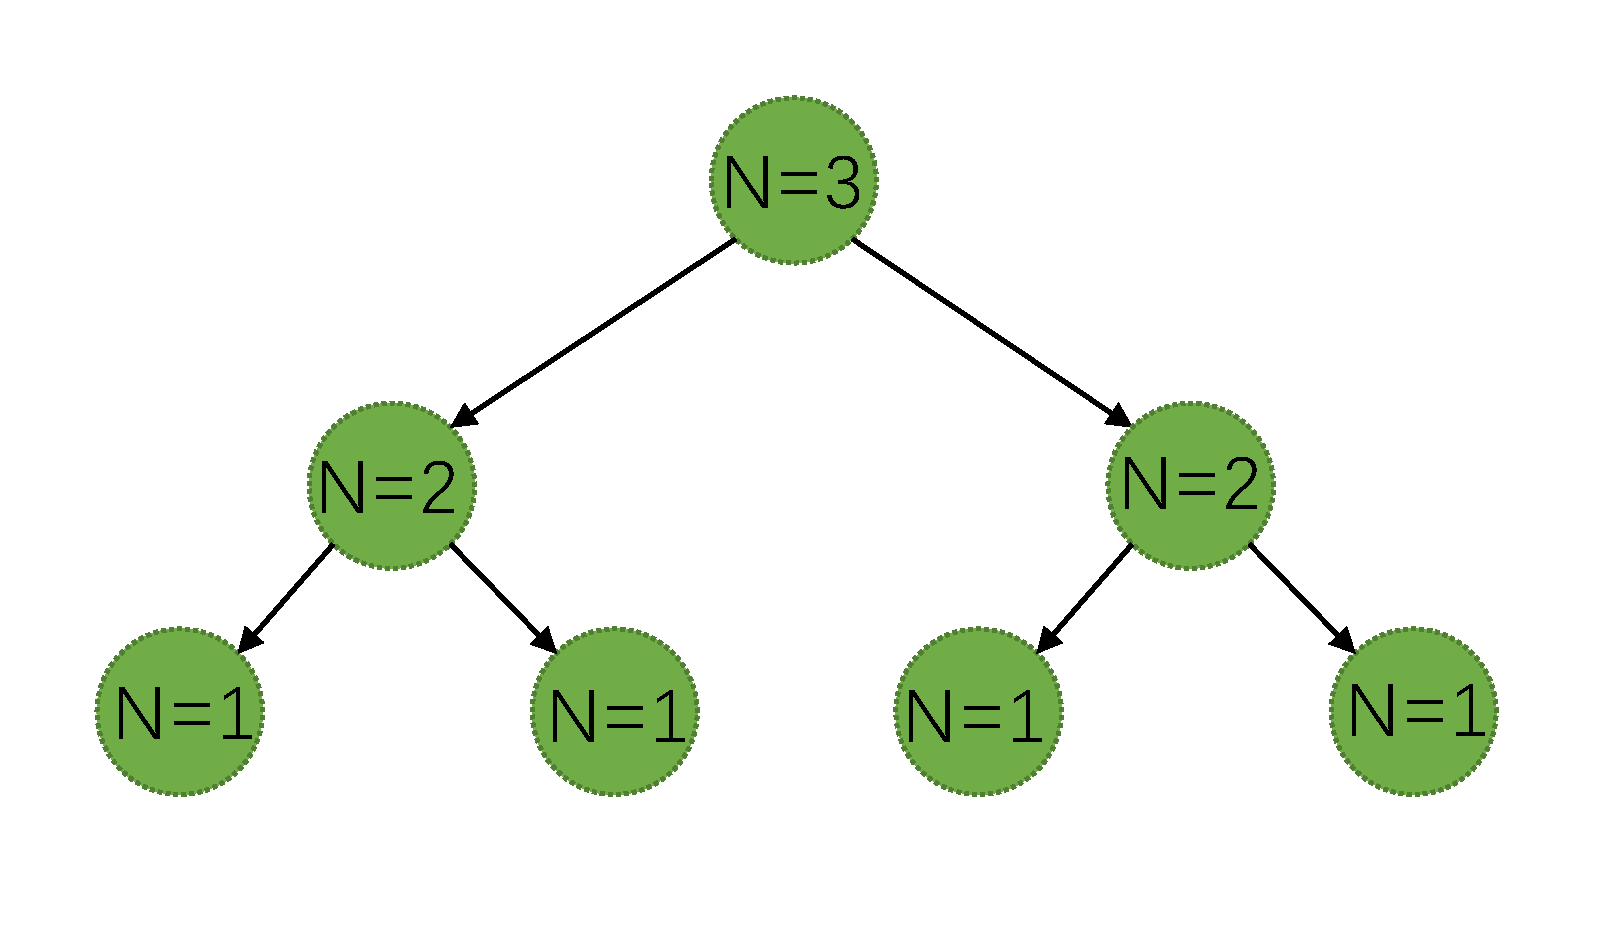

In [2]:
from IPython.display import Image
Image(filename="./images/hanoi_tree.png",  width=400, height=400)

In [28]:
def move(n, a, b, c): # n为a柱子中盘子的数量，目标是借助b将a中的盘子移至c中。
    if n == 1:
        print('move', a, '-->', c)
    else:
        move(n-1, a, c, b)
        move(1, a, b, c)
        move(n-1, b, a, c)

move(3, 'A', 'B', 'C')

move A --> C
move A --> B
move C --> B
move A --> C
move B --> A
move B --> C
move A --> C


In [26]:
def hanoi(n, a, b, c):
    if n==1:
        print(a, " ==> ",  c)
    else:
        hanoi(n-1, a, c, b)   # 将n-1个盘子移到b
        print(a, " ==> ", c) # 将第n个盘子移动到c
        hanoi(n-1, b, a, c)  # 将n-1个盘子移动到c

hanoi(3, 'A', 'B', 'C')

A  ==>  C
A  ==>  B
C  ==>  B
A  ==>  C
B  ==>  A
B  ==>  C
A  ==>  C
